In [1]:
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform

font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
    
%matplotlib inline

In [2]:
import pandas as pd
danawa_data=pd.read_excel('G:/데이터분석 실무_08/datasalon-master/datasalon-master/6_Best_Product/3_2_danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,델로라,V11 파워 300W,134610,70.0,220.0
1,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1031640,120.0,200.0
2,핸디/스틱청소기,다이슨,V8 플러피,435610,40.0,155.0
3,핸디/스틱청소기,LG전자,코드제로 A9S A9300,669250,60.0,200.0
4,핸디/스틱청소기,샤오미,드리미 V10,160010,60.0,220.0


In [4]:
chart_data=danawa_data.dropna(axis=0) #dropna() 값이 없는 차트 삭제 
len(chart_data)

177

In [6]:
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

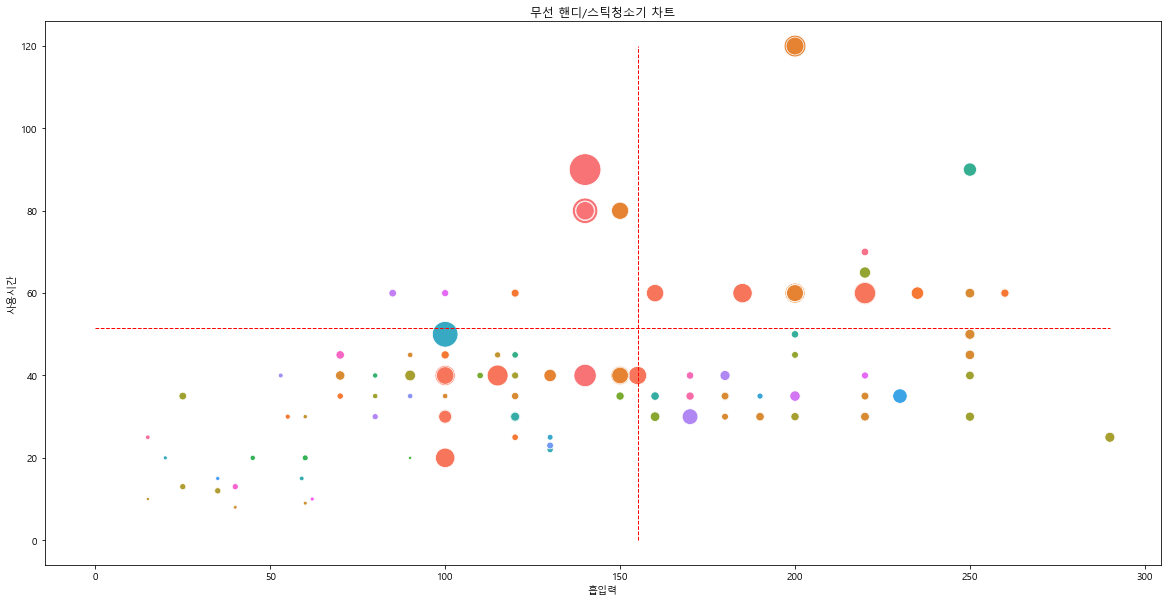

In [8]:
#청소기 성능 시각화
plt.figure(figsize=(20,10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x= '흡입력', y='사용시간',size='가격',hue = chart_data['회사명'], data=chart_data, sizes=(10,1000),legend =False)
plt.plot([0, suction_max_value],
        [use_time_mean_value, use_time_mean_value],
        'r--',
        lw=1)
plt.plot([suction_mean_value, suction_mean_value], 
          [0, use_time_max_value], 
          'r--', 
          lw = 1 )
plt.show()

In [9]:
chart_data_selected= chart_data[:20]
len(chart_data_selected)

20

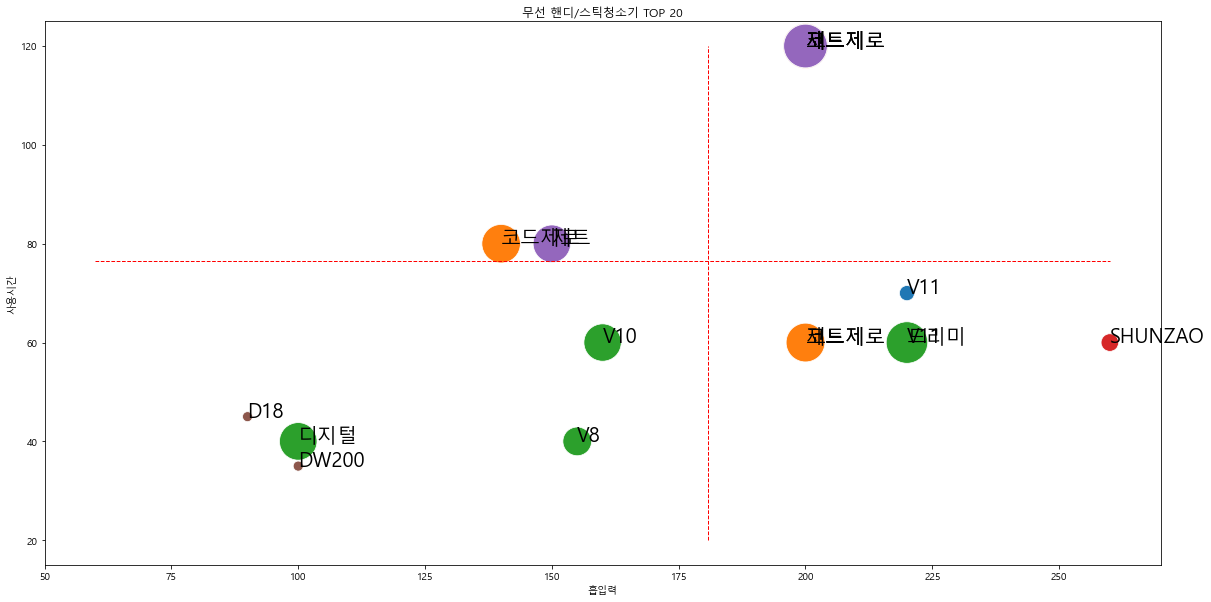

In [10]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', 
                  y = '사용시간', 
                  size = '가격', 
                  hue = chart_data_selected['회사명'], 
                  data = chart_data_selected, sizes = (100, 2000),
                  legend = False)
plt.plot([60, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [20, use_time_max_value], 
          'r--', 
          lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
plt.show()